# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('ds_salaries.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
dataset.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Dataframe manipulation

In [ ]:
# Subtract the employment year to 2023
dataset['work_year'] = 2023 - dataset['work_year']

In [ ]:
# Drop unnecessary columns
dataset = dataset.drop(columns = ['Unnamed: 0', 'salary', 'salary_currency'])

# Move column 'salary_in_usd' to the end
dataset = dataset[[col for col in dataset.columns if col != 'salary_in_usd'] + ['salary_in_usd']]

In [ ]:
# Group job titles
conditions = [
    dataset['job_title'].str.contains('Scientist|Researcher', case=False),
    dataset['job_title'].str.contains('Engineer|Architect|Developer', case=False),
    dataset['job_title'].str.contains('Analyst|Specialist', case=False),
    dataset['job_title'].str.contains('Manager|Lead', case=False),
    dataset['job_title'].str.contains('Director', case=False),
    dataset['job_title'].str.contains('Consultant', case=False)
]

# Assign corresponding values based on conditions
values = ['Scientist', 'Engineer', 'Analyst', 'Manager', 'Director', 'Consultant']

# Create a new Series with the mapped values
group_job_title = np.select(conditions, values, default='Other')

# Add the new column (named 'group_job_title') to the DataFrame
dataset['group_job_title'] = group_job_title

# Move the column beside job_title
col = dataset.pop('group_job_title')
dataset.insert(4, col.name, col)
dataset = dataset.drop(columns = ['job_title'])

In [ ]:
# Group employee_residence and company_location
# Define the list of countries to check for
countries_to_check = ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR']

#Apply the condition and replace values for 'employee_residence' column
employee_residence_condition = dataset['employee_residence'].str.upper().str.contains('|'.join(countries_to_check), case=False)
dataset['employee_residence'] = np.where(employee_residence_condition, dataset['employee_residence'], 'Other')

# Apply the condition and replace values for 'company_location' column
company_location_condition = dataset['company_location'].str.upper().str.contains('|'.join(countries_to_check), case=False)
dataset['company_location'] = np.where(company_location_condition, dataset['company_location'], 'Other')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   group_job_title     607 non-null    object
 4   employee_residence  607 non-null    object
 5   remote_ratio        607 non-null    int64 
 6   company_location    607 non-null    object
 7   company_size        607 non-null    object
 8   salary_in_usd       607 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [ ]:
min_salary_index = dataset['salary_in_usd'].idxmin()
print(dataset.loc[min_salary_index])

work_year                     2
experience_level             MI
employment_type              FT
group_job_title       Scientist
employee_residence        Other
remote_ratio                  0
company_location          Other
company_size                  S
salary_in_usd              2859
Name: 176, dtype: object


In [ ]:
max_salary_index = dataset['salary_in_usd'].idxmax()
print(dataset.loc[max_salary_index])

work_year                    2
experience_level            EX
employment_type             FT
group_job_title       Engineer
employee_residence          US
remote_ratio               100
company_location            US
company_size                 L
salary_in_usd           600000
Name: 252, dtype: object


# Scatter Plot of Each Feature

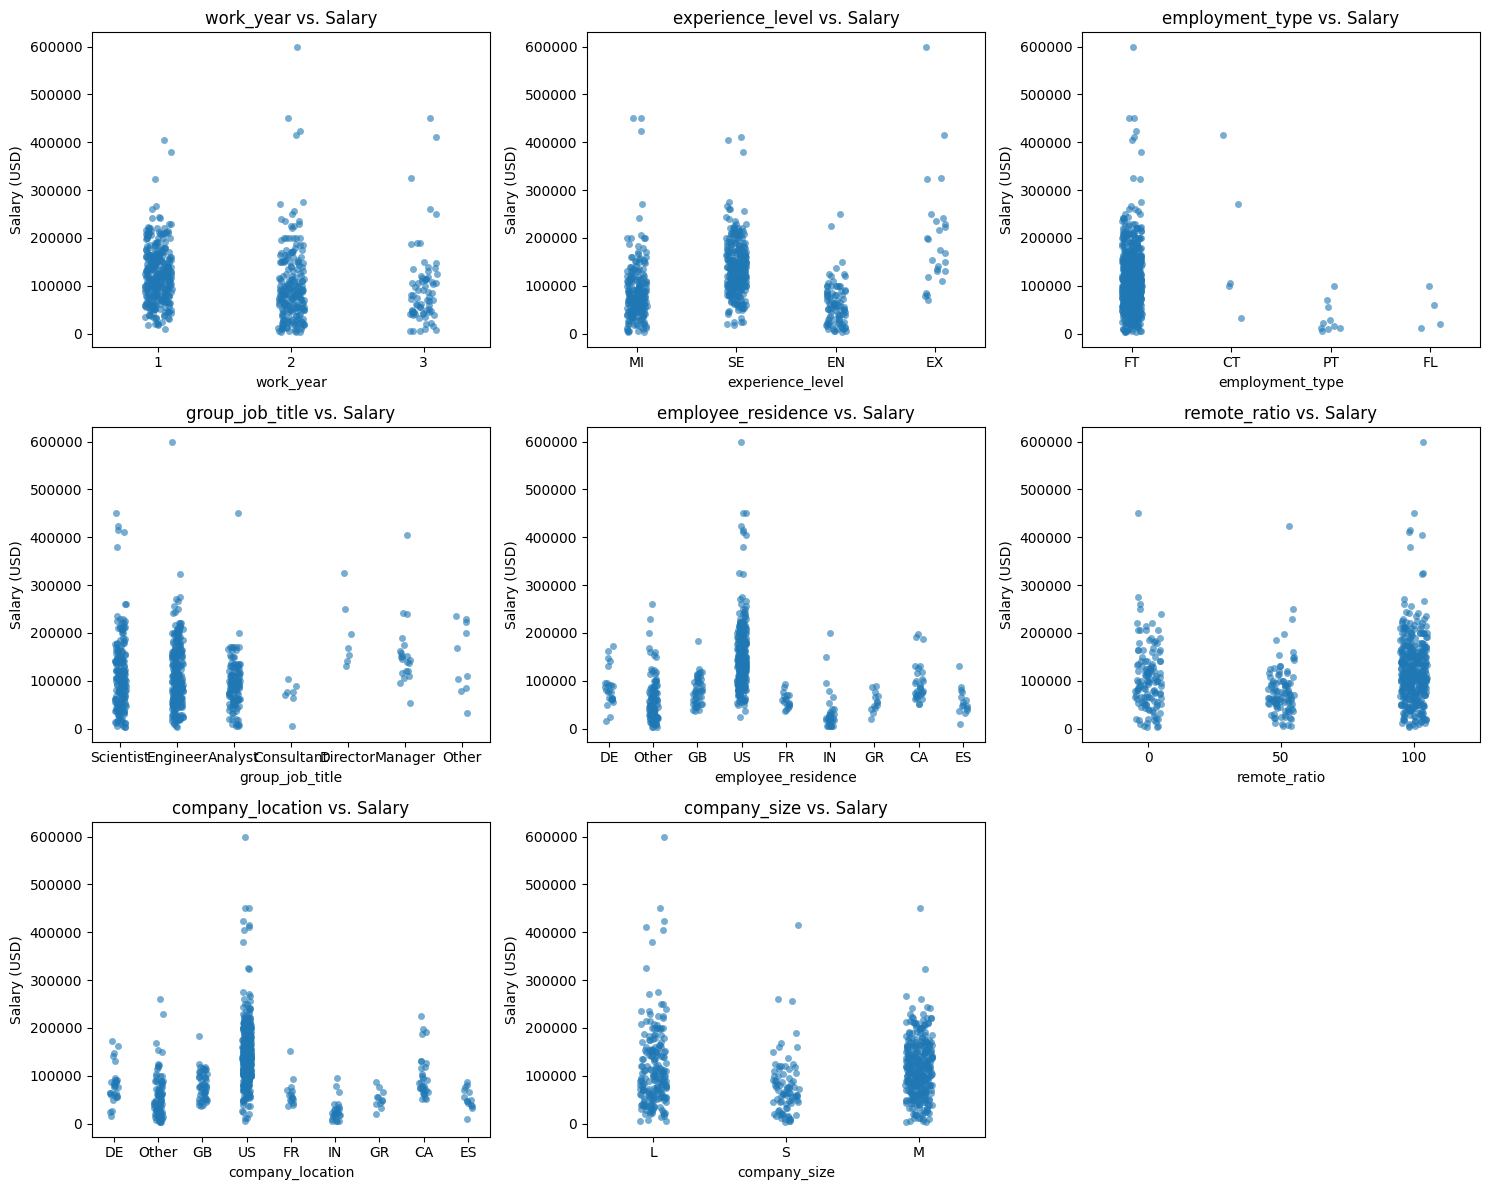

In [ ]:
import seaborn as sns

X_dataset = dataset.iloc[:, :-1]

# Define the number of plots to show in each row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = len(X_dataset.columns) // plots_per_row
if len(X_dataset.columns) % plots_per_row != 0:
    num_rows += 1

# Create a grid of jitter plots with multiple plots in one row
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))

for i, col in enumerate(X_dataset.columns):
    row_index = i // plots_per_row
    col_index = i % plots_per_row
    ax = axes[row_index, col_index]

    # Using stripplot to create a jitter plot
    sns.stripplot(x=X_dataset[col], y=dataset["salary_in_usd"], ax=ax, jitter=True, alpha=0.6, marker='o', edgecolor='w')

    ax.set_title(f"{col} vs. Salary")
    ax.set_xlabel(col)
    ax.set_ylabel("Salary (USD)")

# Remove any remaining empty subplots
for i in range(len(X_dataset.columns), num_rows * plots_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


# Violin Plot of the Features vs Salary

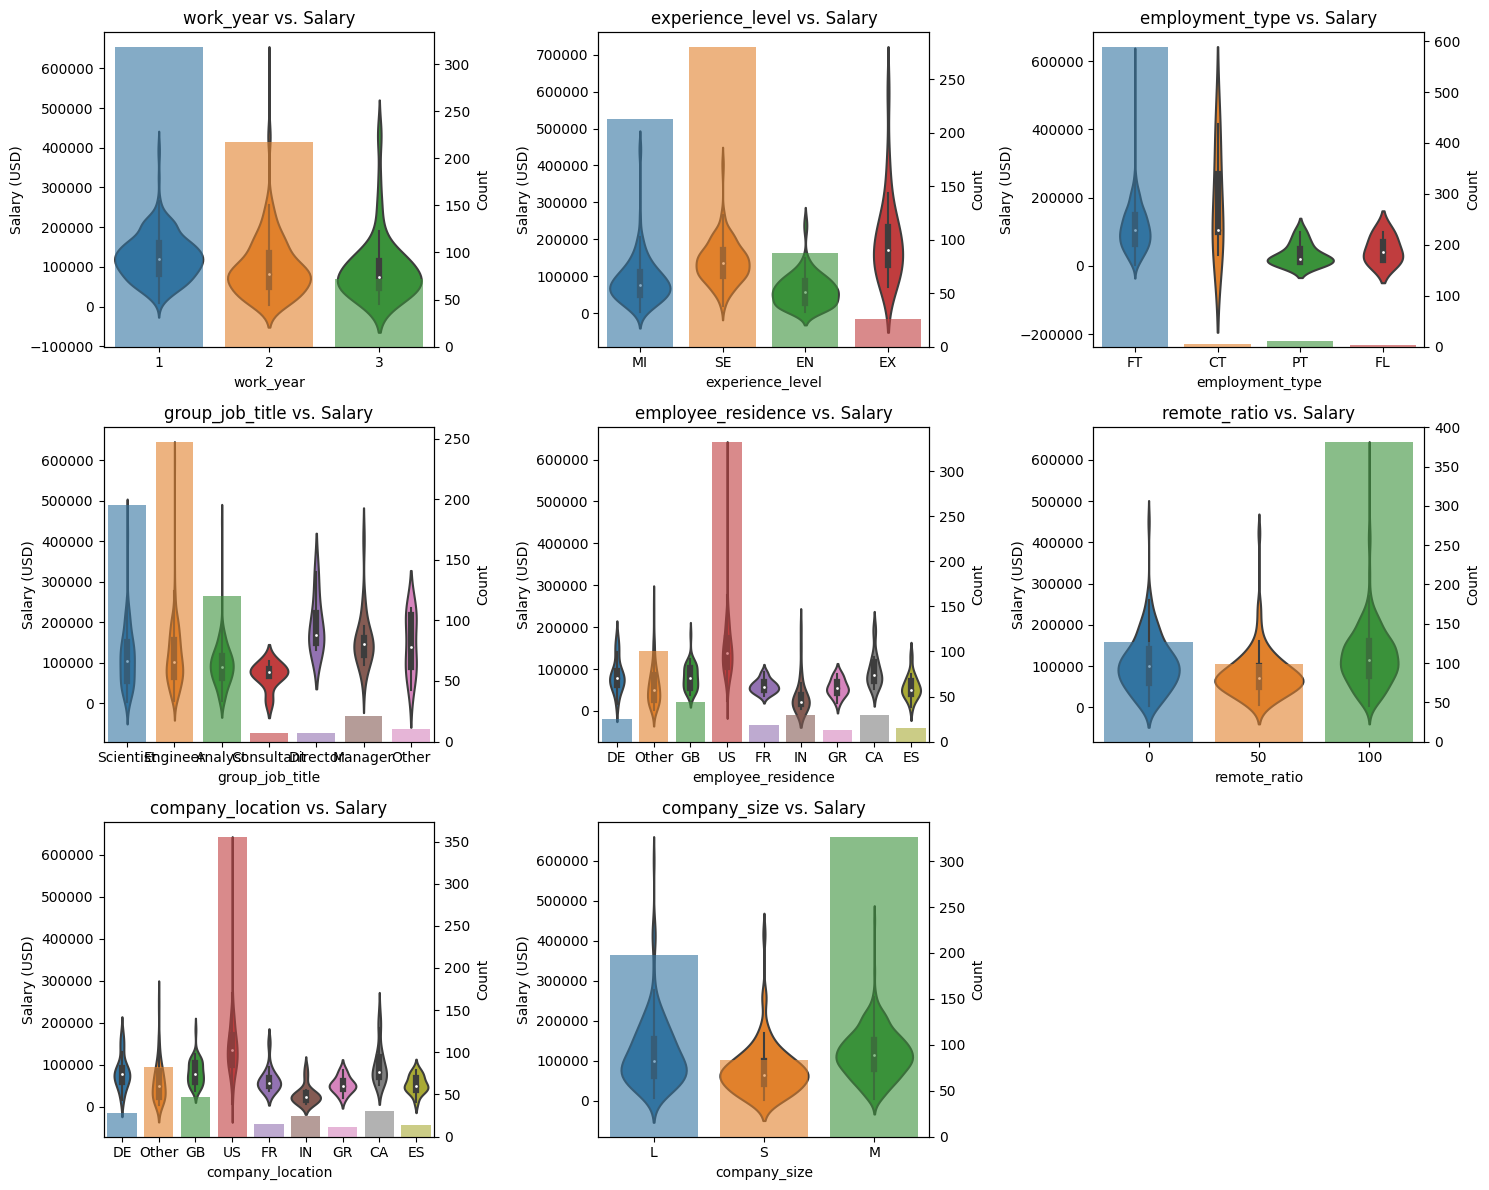

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of plots with multiple plots in one row
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))

for i, col in enumerate(X_dataset.columns):
    row_index = i // plots_per_row
    col_index = i % plots_per_row
    ax = axes[row_index, col_index]

    # Use Seaborn's violinplot for categorical variables
    sns.violinplot(x=X_dataset[col], y=dataset["salary_in_usd"], ax=ax)

    # Create a second y-axis for the count plot
    ax2 = ax.twinx()

    # Plot the count plot on ax2
    sns.countplot(x=X_dataset[col], ax=ax2, alpha=0.6)
    ax2.set_ylabel('Count')
    ax2.grid(False)  # Turn off grid for count plot

    ax.set_title(f"{col} vs. Salary")
    ax.set_xlabel(col)
    ax.set_ylabel("Salary (USD)")

# Remove any remaining empty subplots
for i in range(len(X_dataset.columns), num_rows * plots_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


# Histogram of Salary

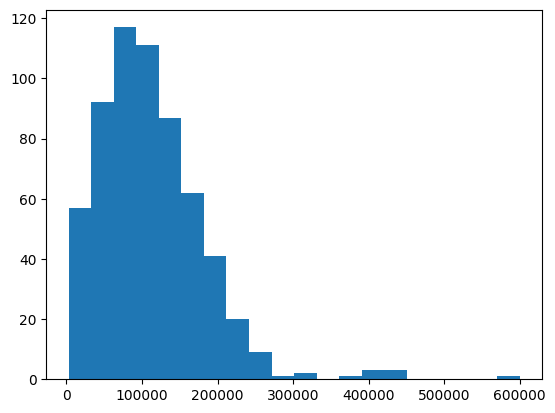

In [ ]:
plt.hist(dataset['salary_in_usd'], bins = 20)
plt.show()

# Identify the distribution of the Salary in USD

In [ ]:
!pip install Fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.9 MB/s eta 0:00:00
  Created wheel for Fitter: filename=fitter-1.6.0-py3-none-any.whl size=26054 sha256=e087476e867dd92d680f1b32ab7a44771eb79bcba126eb8c35e1c0e3ce637e04
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built Fitter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's depe

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,6.602701e-11,3394.045653,3402.862711,inf,0.047508,0.125031
gamma,6.886921e-11,3338.158704,3351.384290,inf,0.046795,0.135734
t,6.927561e-11,3186.843416,3200.069003,inf,0.075730,0.001789
lognorm,7.097775e-11,3059.477122,3072.702709,inf,0.032235,0.542781
exponnorm,7.340128e-11,3051.993299,3065.218886,inf,0.031890,0.556657


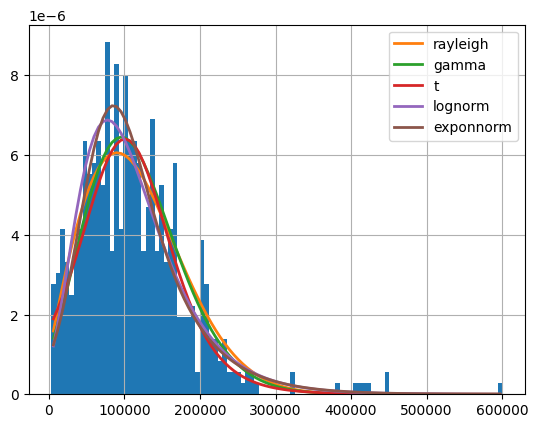

In [ ]:
from fitter import Fitter, get_common_distributions

# fitter
distributions_set = get_common_distributions()
distributions_set.extend(['arcsine', 'cosine', 'expon', 'weibull_max', 'weibull_min',
                          'dweibull', 't', 'pareto', 'exponnorm', 'lognorm',
                         "norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"])

f = Fitter(dataset['salary_in_usd'], distributions = distributions_set)
f.fit()
f.summary()

In [ ]:
f.fitted_param

{'cauchy': (99526.9322989225, 38106.28734595647),
 'expon': (2859.0, 109438.86985172982),
 'chi2': (555.9193978923513, -1008905.4552191424, 2017.4294052576274),
 'exponpow': (1.3053444453258112, -68625.20251017688, 3.902134995832234e-30),
 'lognorm': (0.38536169638255996, -62279.884207008676, 162058.4356533874),
 'norm': (112297.86985172982, 70898.78617574446),
 'powerlaw': (0.4960598455137338, 2858.9999999999995, 597141.0000000001),
 'rayleigh': (-10260.106677143249, 100117.6694995587),
 'uniform': (2859.0, 597141.0),
 'arcsine': (2857.2998280505253, 597142.7001719496),
 'gamma': (12.9835579420171, -116752.71135410087, 17741.207762417776),
 'cosine': (148669.0551316315, 96982.46784348965),
 'weibull_min': (1.619452966333391, 1039.8659156040064, 124075.31861211045),
 'weibull_max': (0.06266426057070767, 600000.0000000001, 1.755638101602183),
 'dweibull': (1.1858863987921648, 107359.1079966228, 55403.2203452215),
 'pareto': (0.02617714457352301, 2858.999999999998, 1.8189894035458563e-12

# Correlation between Features

In [ ]:
from scipy.stats import chi2_contingency

# Initialize an empty dictionary to store p-values
p_values = {}

# Create an empty matrix to store p-values
num_columns = len(dataset.columns)
p_value_matrix = pd.DataFrame(columns=dataset.columns, index=dataset.columns)

# Loop through each pair of columns
for col1 in dataset.columns:
    for col2 in dataset.columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(dataset[col1], dataset[col2])

            # Perform the chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Store the p-value in the matrix
            p_value_matrix.at[col1, col2] = p

# Display the p-value matrix
print(p_value_matrix)

                   work_year experience_level employment_type group_job_title  \
work_year                NaN              0.0        0.242995        0.016854   
experience_level         0.0              NaN        0.000037             0.0   
employment_type     0.242995         0.000037             NaN        0.995986   
group_job_title     0.016854              0.0        0.995986             NaN   
employee_residence       0.0              0.0        0.005845             0.0   
remote_ratio             0.0         0.000056        0.005888          0.0901   
company_location         0.0              0.0        0.587341        0.000001   
company_size             0.0              0.0        0.326914        0.002966   
salary_in_usd            0.0          0.00065        0.999673             0.0   

                   employee_residence remote_ratio company_location  \
work_year                         0.0          0.0              0.0   
experience_level                  0.0     0.000

# Defining X and y

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

In [ ]:
print(X.shape)
print(y.shape)

(607, 8)
(607,)


## Encoding categorical data and Splitting to Train and Test Set

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

columns_to_encode = [1, 2, 3, 4, 5, 6, 7]

# Create a ColumnTransformer to apply one-hot encoding to the specified columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

# Fit and transform the ColumnTransformer on X
X_encoded = ct.fit_transform(X)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

In [ ]:
# Get the feature names for one-hot encoded columns
one_hot_encoder = ct.named_transformers_['encoder']
encoded_feature_names = one_hot_encoder.get_feature_names_out(input_features=dataset.columns[columns_to_encode])

# Columns that were not one-hot encoded
columns_not_encoded = [0]

# Create a list of feature names for non-encoded columns
feature_names_not_encoded = dataset.columns[columns_not_encoded].tolist()

# Combine feature names of one-hot encoded and non-encoded columns into a single list
all_feature_names = list(encoded_feature_names) + feature_names_not_encoded

# Print the combined list of feature names
print(all_feature_names)

# Print the first row of X_train with feature names
first_row = X_train[0].toarray().tolist()
print("First Row of X_train:")
print("all_feature_names")

['experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE', 'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'group_job_title_Analyst', 'group_job_title_Consultant', 'group_job_title_Director', 'group_job_title_Engineer', 'group_job_title_Manager', 'group_job_title_Other', 'group_job_title_Scientist', 'employee_residence_CA', 'employee_residence_DE', 'employee_residence_ES', 'employee_residence_FR', 'employee_residence_GB', 'employee_residence_GR', 'employee_residence_IN', 'employee_residence_Other', 'employee_residence_US', 'remote_ratio_0', 'remote_ratio_50', 'remote_ratio_100', 'company_location_CA', 'company_location_DE', 'company_location_ES', 'company_location_FR', 'company_location_GB', 'company_location_GR', 'company_location_IN', 'company_location_Other', 'company_location_US', 'company_size_L', 'company_size_M', 'company_size_S', 'work_year']
First Row of X_train:
all_feature_names


In [ ]:
print(X_train.shape)
print(X_test.shape)

(485, 40)
(122, 40)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(485,)
(122,)


## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Model Performance Measures

In [ ]:
def compute_r_squared_and_adjusted(regressor, X, y):

    # Calculate the R-squared value
    r_squared = regressor.score(X, y)

    # Get the number of observations and the number of predictors
    num_observations = X.shape[0]
    num_features = X.shape[1]

    # Calculate the adjusted R-squared
    adjusted_r_squared = 1 - (1 - r_squared) * (num_observations - 1) / (num_observations - num_features - 1)

    return r_squared, adjusted_r_squared

# For training data:
train_r2, train_adj_r2 = compute_r_squared_and_adjusted(regressor, X_train, y_train)
print("Training R-squared:", train_r2)
print("Training Adjusted R-squared:", train_adj_r2)

# For test data:
test_r2, test_adj_r2 = compute_r_squared_and_adjusted(regressor, X_test, y_test)
print("\nTest R-squared:", test_r2)
print("Test Adjusted R-squared:", test_adj_r2)


Training R-squared: 0.5242306568911997
Training Adjusted R-squared: 0.4813685539084249

Test R-squared: 0.4661630743127444
Test Adjusted R-squared: 0.20253990113385278


In [ ]:
import statsmodels.api as sm

# Calculate the R-squared value
r_squared = regressor.score(X_train, y_train)

# Get the number of observations and the number of predictors
num_observations = X_train.shape[0]
num_features = X_train.shape[1]

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (num_observations - 1) / (num_observations - num_features - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

R-squared: 0.5242306568911997
Adjusted R-squared: 0.4813685539084249


# Getting the final linear regression equation with the values of the coefficients

In [ ]:
# Get coefficients and intercept
coefficients = np.append(regressor.intercept_, regressor.coef_)

In [ ]:
# Calculate residuals
y_pred = regressor.predict(X_train)
residuals = y_train - y_pred

Text(0.5, 1.0, 'Residual Plot')

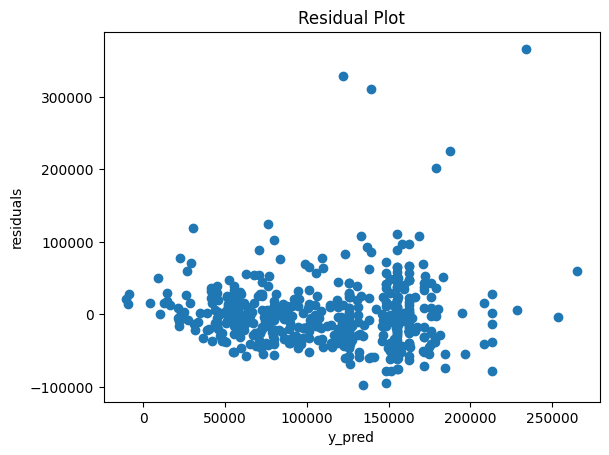

In [ ]:
plt.scatter(y_pred, residuals)
plt.xlabel("y_pred")
plt.ylabel("residuals")
plt.title("Residual Plot")

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponnorm,8.077082e-11,3128.899736,3141.452182,inf,0.024693,0.921665
t,1.060698e-10,3144.205226,3156.757673,inf,0.048205,0.203069
dweibull,1.750008e-10,3270.364661,3282.917107,inf,0.086946,0.001223
cauchy,1.915985e-10,2915.618885,2923.987183,inf,0.098875,0.000140
norm,2.219584e-10,3955.011072,3963.379370,inf,0.101547,0.000083


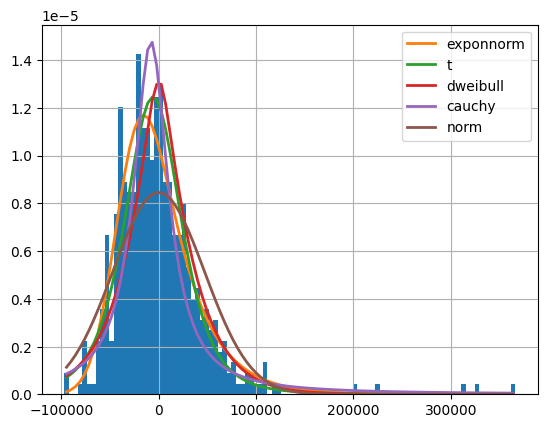

In [ ]:
from fitter import Fitter, get_common_distributions

# fitter
distributions_set = get_common_distributions()
distributions_set.extend(['arcsine', 'cosine', 'expon', 'weibull_max', 'weibull_min',
                          'dweibull', 't', 'pareto', 'exponnorm', 'lognorm',
                         "norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"])

f = Fitter(residuals, distributions = distributions_set)
f.fit()
f.summary()

In [ ]:
# Calculate the standard errors of the coefficients
X_train_dense = X_train.toarray()  # Convert X_train to a dense array
X_train_with_intercept = np.column_stack((np.ones(X_train_dense.shape[0]), X_train_dense))  # Add a column of ones for the intercept
mse = np.mean(residuals ** 2)  # Mean squared error
covariance_matrix = np.linalg.pinv(np.dot(X_train_with_intercept.T, X_train_with_intercept)) * mse
se = np.sqrt(np.diag(covariance_matrix))

In [ ]:
from scipy import stats
from IPython.display import display, HTML

# Degrees of freedom
dof = X_train_with_intercept.shape[0] - len(coefficients)

# Calculate t-statistics, p-values, and confidence intervals
t_statistics = coefficients / se
p_values = [2 * (1 - stats.t.cdf(np.abs(t), dof)) for t in t_statistics]
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, dof)
margin_of_error = t_critical * se
confidence_intervals = np.column_stack((coefficients - margin_of_error, coefficients + margin_of_error))

# Create a DataFrame to display the results
import pandas as pd

feature_names = ['Intercept'] + all_feature_names  # Include 'Intercept' as the first feature name
results_df = pd.DataFrame({'Feature': feature_names,
                           'Coefficient': coefficients,
                           'Standard Error': se,
                           't-Statistic': t_statistics,
                           't-critical': t_critical,
                           'p-Value': p_values,
                           'Lower CI': confidence_intervals[:, 0],
                           'Upper CI': confidence_intervals[:, 1]})

# Display the results using an HTML table
display(HTML(results_df.to_html(index=False)))


Feature,Coefficient,Standard Error,t-Statistic,t-critical,p-Value,Lower CI,Upper CI
Intercept,67639.072989,6317.197277,10.707133,1.965321,0.000000e+00,55223.750721,80054.395256
experience_level_EN,-41436.024166,6419.350833,-6.454862,1.965321,2.842255e-10,-54052.110990,-28819.937342
experience_level_EX,60881.459536,10242.916572,5.943762,1.965321,5.639693e-09,40750.837581,81012.081491
experience_level_MI,-22059.035338,5002.002790,-4.410041,1.965321,1.298169e-05,-31889.577887,-12228.492789
experience_level_SE,2613.599968,4792.933403,0.545303,1.965321,5.858191e-01,-6806.054065,12033.254001
employment_type_CT,-19143.246232,27448.533849,-0.697423,1.965321,4.859030e-01,-73088.434034,34801.941570
employment_type_FL,-13553.967455,21836.324595,-0.620707,1.965321,5.351107e-01,-56469.360957,29361.426046
employment_type_FT,15145.954507,10761.096321,1.407473,1.965321,1.599868e-01,-6003.057137,36294.966151
employment_type_PT,17551.259181,17301.544882,1.014433,1.965321,3.109286e-01,-16451.835231,51554.353592
group_job_title_Analyst,-28718.192735,7205.889048,-3.985378,1.965321,7.874327e-05,-42880.079855,-14556.305614


# Weights Plot

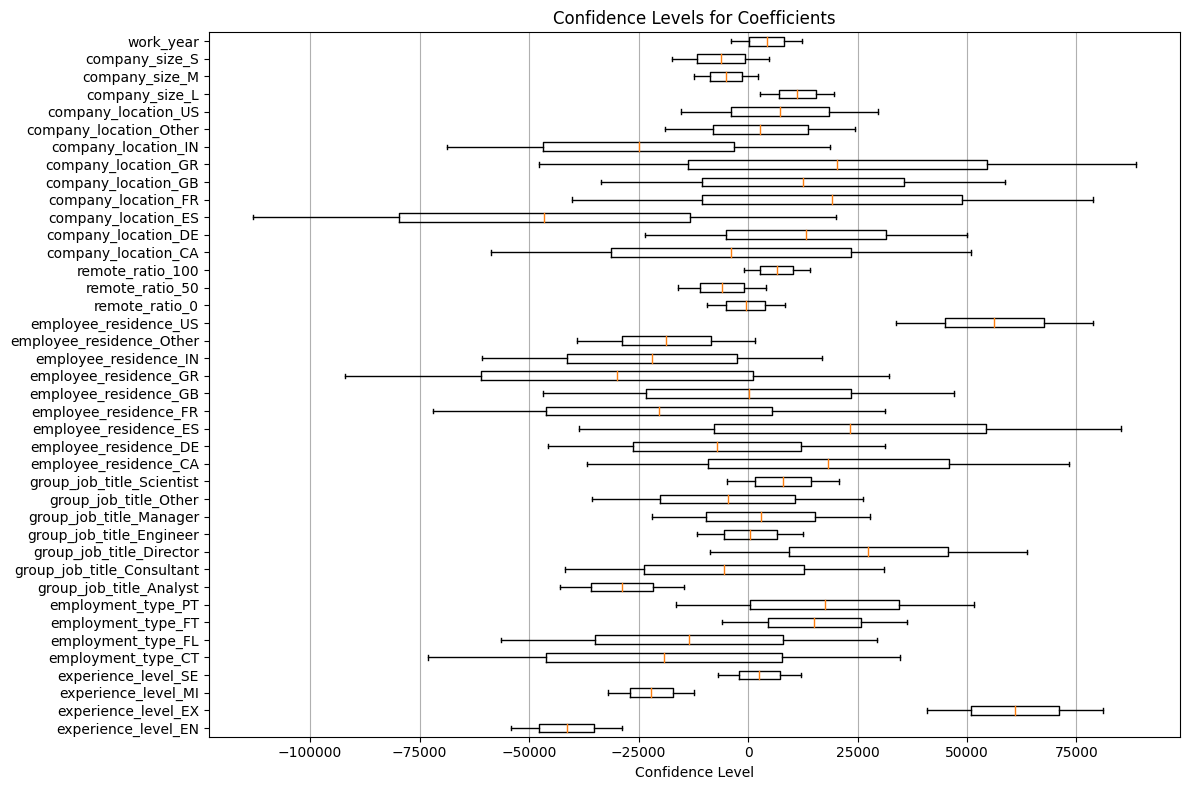

In [ ]:
# Initialize empty lists to store data and labels for box plots
boxplot_data = []
boxplot_labels = []

# Loop through coefficients, confidence intervals, and labels
for i in range(0, num_features): #all_feature_names does not include the intercept
    coefficient_label = all_feature_names[i]
    confidence_interval = confidence_intervals[i+1] # exclude the intercepts

    # Append the confidence interval data and label
    boxplot_data.append(confidence_interval)
    boxplot_labels.append(coefficient_label)

# Create a figure for all box plots
plt.figure(figsize=(12, 8))

# Create the box plots
plt.boxplot(boxplot_data, labels=boxplot_labels, vert=False)
plt.xlabel('Confidence Level')
plt.title('Confidence Levels for Coefficients')
plt.grid(axis='x')
plt.tight_layout()

# Show the box plots
plt.show()

# Effects plot

In [ ]:
# Determining the effects of each feature
boxplot_data = []
boxplot_labels = []
#num_observations = X_train.shape[0]
#num_features = X_train.shape[1]

effects = np.empty((num_observations,num_features))

# Loop through coefficients, confidence intervals, and labels
for i in range(0, num_features):
    for j in range (0, X_train.shape[0]):
      effects[j,i] = coefficients[i+1]  * X_train[j,i]

print(effects.shape)

(485, 40)


(485, 8)


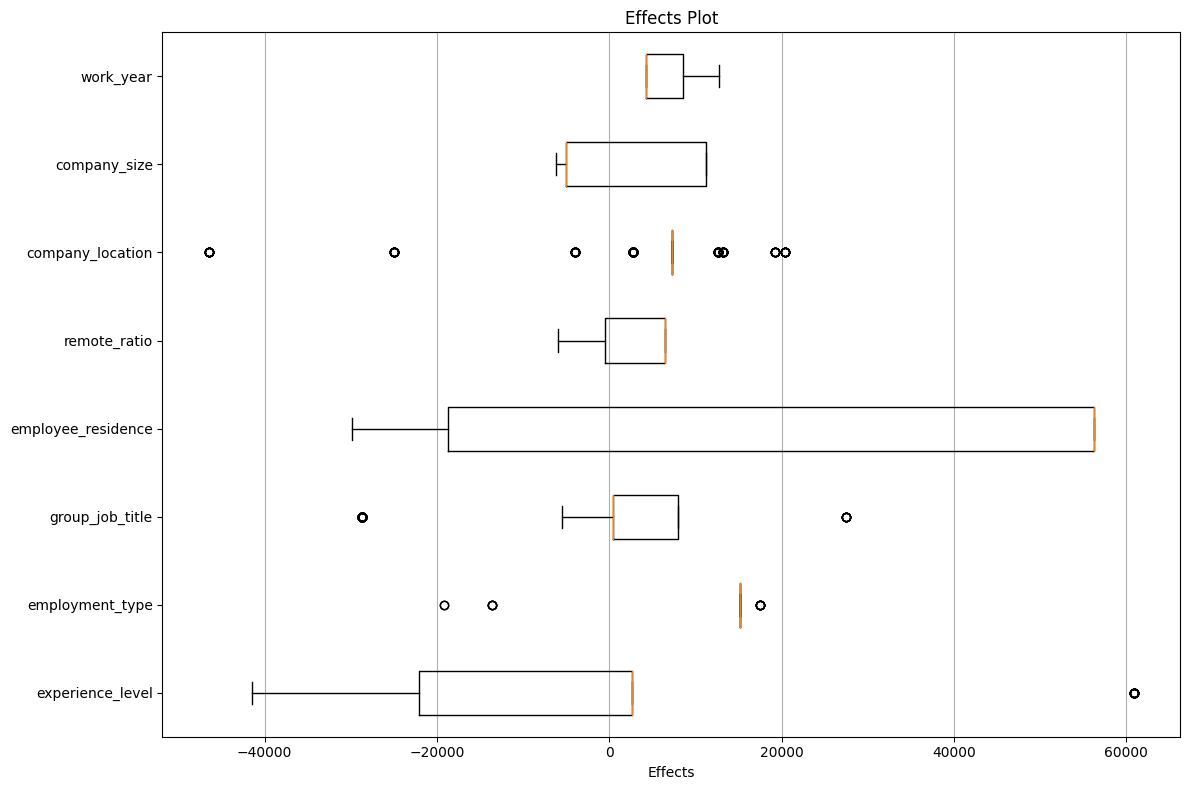

In [ ]:
# Summarizing the effects of categorical variables

orig_num_categories = X.shape[1]
effects_matrix = np.zeros((num_observations, orig_num_categories))

# Define the category mapping including both one-hot encoded and non-one-hot encoded categories
category_mapping = {
    'experience_level': ['experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE'],
    'employment_type': ['employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT'],
    'group_job_title': ['group_job_title_Analyst', 'group_job_title_Consultant', 'group_job_title_Director', 'group_job_title_Engineer', 'group_job_title_Manager', 'group_job_title_Other', 'group_job_title_Scientist'],
    'employee_residence': ['employee_residence_CA', 'employee_residence_DE', 'employee_residence_ES', 'employee_residence_FR', 'employee_residence_GB', 'employee_residence_GR', 'employee_residence_IN', 'employee_residence_Other', 'employee_residence_US'],
    'remote_ratio': ['remote_ratio_0', 'remote_ratio_50', 'remote_ratio_100'],
    'company_location': ['company_location_CA', 'company_location_DE', 'company_location_ES', 'company_location_FR', 'company_location_GB', 'company_location_GR', 'company_location_IN', 'company_location_Other', 'company_location_US'],
    'company_size': ['company_size_L', 'company_size_M', 'company_size_S'],
    'work_year': ['work_year'],
}

# Iterate through the categories and calculate and populate the effects matrix
for i, (category, columns) in enumerate(category_mapping.items()):
    # Get the column indices corresponding to the category
    column_indices = [all_feature_names.index(col) for col in columns]

    # Calculate the sum of effects for each observation and populate the effects matrix
    effects_matrix[:, i] = np.sum(effects[:, column_indices], axis=1)

print(effects_matrix.shape)

# Create a list of labels using the keys from the category_mapping dictionary
boxplot_labels = list(category_mapping.keys())

# Create a figure for all box plots
plt.figure(figsize=(12, 8))

# Create the box plots with labels as category names
plt.boxplot(effects_matrix, labels=boxplot_labels, vert=False)
plt.xlabel('Effects')
plt.title('Effects Plot')
plt.grid(axis='x')
plt.tight_layout()

# Show the box plots
plt.show()


# Fitting a Regression with Single Feature

In [ ]:
# Define the category mapping including both one-hot encoded and non-one-hot encoded categories
category_mapping = {
    'experience_level': ['experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE'],
    'employment_type': ['employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT'],
    'group_job_title': ['group_job_title_Analyst', 'group_job_title_Consultant', 'group_job_title_Director', 'group_job_title_Engineer', 'group_job_title_Manager', 'group_job_title_Other', 'group_job_title_Scientist'],
    'employee_residence': ['employee_residence_CA', 'employee_residence_DE', 'employee_residence_ES', 'employee_residence_FR', 'employee_residence_GB', 'employee_residence_GR', 'employee_residence_IN', 'employee_residence_Other', 'employee_residence_US'],
    'remote_ratio': ['remote_ratio_0', 'remote_ratio_50', 'remote_ratio_100'],
    'company_location': ['company_location_CA', 'company_location_DE', 'company_location_ES', 'company_location_FR', 'company_location_GB', 'company_location_GR', 'company_location_IN', 'company_location_Other', 'company_location_US'],
    'company_size': ['company_size_L', 'company_size_M', 'company_size_S'],
    'work_year': ['work_year'],
}

feature_regressor = LinearRegression()
train_r2_values = []  # To store training R^2 values
test_r2_values = []   # To store test R^2 values

# Iterate through the categories and calculate and populate the effects matrix
for i, (category, columns) in enumerate(category_mapping.items()):
    # Get the column indices corresponding to the category
    column_indices = [all_feature_names.index(col) for col in columns]

    # Get the corresponding columns in X_train and X_test
    X_train_feature = X_train[:, column_indices]
    X_test_feature = X_test[:, column_indices]

    # Fit the regressor
    feature_regressor.fit(X_train_feature, y_train)

    # Calculate the R-squared value for training data
    train_r2 = feature_regressor.score(X_train_feature, y_train)
    train_r2_values.append((category, train_r2))

    # Calculate the R-squared value for test data
    test_r2 = feature_regressor.score(X_test_feature, y_test)
    test_r2_values.append((category, test_r2))

print("Train R-squared values:")
for category, r2 in train_r2_values:
    print(f"{category}: {r2}")

print("\n")

print("Test R-squared values:")
for category, r2 in test_r2_values:
    print(f"{category}: {r2}")

Train R-squared values:
experience_level: 0.23548828765292618
employment_type: 0.026652031356892425
group_job_title: 0.046862472985566894
employee_residence: 0.35578289289415943
remote_ratio: 0.04763449913843587
company_location: 0.3012160287775222
company_size: 0.045269836750681636
work_year: 0.026940056173950455


Test R-squared values:
experience_level: 0.262578833905978
employment_type: 0.015046154647640808
group_job_title: 0.05816709839917311
employee_residence: 0.3365046315512662
remote_ratio: 0.0394396877165224
company_location: 0.3443429283041829
company_size: 0.01573973484876523
work_year: 0.03452445904696411


# Fitting Regression with Selected Features

In [ ]:
# Define the categories you want to include
selected_categories = [
    'experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
    # 'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
    # 'group_job_title_Analyst', 'group_job_title_Consultant', 'group_job_title_Director',
    # 'group_job_title_Engineer', 'group_job_title_Manager', 'group_job_title_Other', 'group_job_title_Scientist',
    'employee_residence_CA', 'employee_residence_DE', 'employee_residence_ES',
    'employee_residence_FR', 'employee_residence_GB', 'employee_residence_GR',
    'employee_residence_IN', 'employee_residence_Other', 'employee_residence_US',
    # 'remote_ratio_0', 'remote_ratio_50', 'remote_ratio_100',
    'company_location_CA', 'company_location_DE', 'company_location_ES',
    'company_location_FR', 'company_location_GB', 'company_location_GR',
    'company_location_IN', 'company_location_Other', 'company_location_US',
    'company_size_L', 'company_size_M', 'company_size_S',
    # 'work_year'
]

# Find the indices of the selected columns in the original X_train
selected_indices = [all_feature_names.index(col) for col in selected_categories]

# Create a new X_train based on the selected columns
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# Fit the model
selected_regressor = LinearRegression()
selected_regressor.fit(X_train_selected, y_train)

# Calculate the R-squared value
r_squared = selected_regressor.score(X_train_selected, y_train)
print(f"R-squared: {r_squared}")

r_squared_train = selected_regressor.score(X_test_selected,y_test)
print(f"Test R-squared: {r_squared_train}")

R-squared: 0.4822484617345305
Test R-squared: 0.46339663025937894


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 100)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [ ]:
# Calculate the R-squared value
lasso_r_squared = lasso.score(X_train, y_train)

print(f"Laso R-squared: {lasso_r_squared}")

test_lasso_r_squared = lasso.score(X_test, y_test)

print(f"Laso R-squared: {test_lasso_r_squared}")


Laso R-squared: 0.5211290196009797
Laso R-squared: 0.48658921234139696


In [ ]:
# Get coefficients and intercept
lasso_coefficients = np.append(lasso.intercept_, lasso.coef_)

In [ ]:
# Calculate residuals
lasso_y_pred = lasso.predict(X_train)
lasso_residuals = y_train - lasso_y_pred

In [ ]:
# Calculate the standard errors of the coefficients
X_train_dense = X_train.toarray()  # Convert X_train to a dense array
X_train_with_intercept = np.column_stack((np.ones(X_train_dense.shape[0]), X_train_dense))  # Add a column of ones for the intercept
mse = np.mean(lasso_residuals ** 2)  # Mean squared error
covariance_matrix = np.linalg.pinv(np.dot(X_train_with_intercept.T, X_train_with_intercept)) * mse
se = np.sqrt(np.diag(covariance_matrix))

In [ ]:
from scipy import stats
from IPython.display import display, HTML

# Degrees of freedom
dof = X_train_with_intercept.shape[0] - len(lasso_coefficients)

# Calculate t-statistics, p-values, and confidence intervals
t_statistics = lasso_coefficients / se
p_values = [2 * (1 - stats.t.cdf(np.abs(t), dof)) for t in t_statistics]
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, dof)
margin_of_error = t_critical * se
confidence_intervals = np.column_stack((lasso_coefficients - margin_of_error, lasso_coefficients + margin_of_error))

# Create a DataFrame to display the results
import pandas as pd

feature_names = ['Intercept'] + all_feature_names  # Include 'Intercept' as the first feature name
results_df = pd.DataFrame({'Feature': feature_names,
                           'Lasso_Coefficient': lasso_coefficients,
                           'Standard Error': se,
                           't-Statistic': t_statistics,
                           't-critical': t_critical,
                           'p-Value': p_values,
                           'Lower CI': confidence_intervals[:, 0],
                           'Upper CI': confidence_intervals[:, 1]})

# Display the results using an HTML table
display(HTML(results_df.to_html(index=False)))

Feature,Lasso_Coefficient,Standard Error,t-Statistic,t-critical,p-Value,Lower CI,Upper CI
Intercept,71746.255141,6337.755374,11.320452,1.965321,0.000000e+00,59290.529608,84201.980674
experience_level_EN,-38681.424505,6440.241369,-6.006207,1.965321,3.956386e-09,-51338.567944,-26024.281066
experience_level_EX,59676.880111,10276.250163,5.807262,1.965321,1.211383e-08,39480.746939,79873.013282
experience_level_MI,-19941.357921,5018.280841,-3.973743,1.965321,8.255275e-05,-29803.892070,-10078.823772
experience_level_SE,3797.421187,4808.531078,0.789726,1.965321,4.301094e-01,-5652.887288,13247.729663
employment_type_CT,-941.172278,27537.859794,-0.034177,1.965321,9.727511e-01,-55061.914262,53179.569705
employment_type_FL,-6406.130746,21907.386690,-0.292419,1.965321,7.701031e-01,-49461.184097,36648.922605
employment_type_FT,7384.079545,10796.116228,0.683957,1.965321,4.943591e-01,-13833.757467,28601.916558
employment_type_PT,53.375374,17357.849414,0.003075,1.965321,9.975479e-01,-34060.375533,34167.126281
group_job_title_Analyst,-29356.444912,7229.339221,-4.060737,1.965321,5.782472e-05,-43564.419155,-15148.470668


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

# define grid
grid = dict()
grid['alpha'] = arange(0, 100, 1)

# define search
search = GridSearchCV(lasso, grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)

# Get the best alpha and R-squared value
best_alpha = results.best_params_['alpha']
best_r2 = results.best_score_

# summarize
print('Best Alpha: %.3f' % best_alpha)
print('Best R-squared: %.3f' % best_r2)

Best Alpha: 99.000
Best R-squared: 0.471


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [ ]:
# Get coefficients and intercept
ridge_coefficients = np.append(ridge.intercept_, ridge.coef_)

In [ ]:
# Calculate the R-squared value
ridge_r_squared = ridge.score(X_train, y_train)

print(f"Ridge R-squared: {ridge_r_squared}")

test_ridge_r_squared = ridge.score(X_test, y_test)

print(f"Test_Ridge R-squared: {test_ridge_r_squared}")

Ridge R-squared: 0.5130194584257542
Test_Ridge R-squared: 0.46957664005932875


In [ ]:
# Calculate residuals
ridge_y_pred = ridge.predict(X_train)
ridge_residuals = y_train - ridge_y_pred

In [ ]:
# Calculate the standard errors of the coefficients
X_train_dense = X_train.toarray()  # Convert X_train to a dense array
X_train_with_intercept = np.column_stack((np.ones(X_train_dense.shape[0]), X_train_dense))  # Add a column of ones for the intercept
mse = np.mean(ridge_residuals ** 2)  # Mean squared error
covariance_matrix = np.linalg.pinv(np.dot(X_train_with_intercept.T, X_train_with_intercept)) * mse
se = np.sqrt(np.diag(covariance_matrix))

In [ ]:
from scipy import stats
from IPython.display import display, HTML

# Degrees of freedom
dof = X_train_with_intercept.shape[0] - len(ridge_coefficients)

# Calculate t-statistics, p-values, and confidence intervals
t_statistics = ridge_coefficients / se
p_values = [2 * (1 - stats.t.cdf(np.abs(t), dof)) for t in t_statistics]
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, dof)
margin_of_error = t_critical * se
confidence_intervals = np.column_stack((ridge_coefficients - margin_of_error, ridge_coefficients + margin_of_error))

# Create a DataFrame to display the results
import pandas as pd

feature_names = ['Intercept'] + all_feature_names  # Include 'Intercept' as the first feature name
results_df = pd.DataFrame({'Feature': feature_names,
                           'Lasso_Coefficient': ridge_coefficients,
                           'Standard Error': se,
                           't-Statistic': t_statistics,
                           't-critical': t_critical,
                           'p-Value': p_values,
                           'Lower CI': confidence_intervals[:, 0],
                           'Upper CI': confidence_intervals[:, 1]})

# Display the results using an HTML table
display(HTML(results_df.to_html(index=False)))

Feature,Lasso_Coefficient,Standard Error,t-Statistic,t-critical,p-Value,Lower CI,Upper CI
Intercept,74083.659614,6391.194237,11.591521,1.965321,0.000000,61522.909545,86644.409682
experience_level_EN,-31871.732830,6494.544376,-4.907462,1.965321,0.000001,-44635.599126,-19107.866534
experience_level_EX,44069.793278,10362.897737,4.252652,1.965321,0.000026,23703.369786,64436.216771
experience_level_MI,-17912.357364,5060.594122,-3.539576,1.965321,0.000443,-27858.050705,-7966.664024
experience_level_SE,5714.296916,4849.075785,1.178430,1.965321,0.239256,-3815.694935,15244.288767
employment_type_CT,-3926.969941,27770.054292,-0.141410,1.965321,0.887610,-58504.048713,50650.108831
employment_type_FL,-6824.295360,22092.106007,-0.308902,1.965321,0.757541,-50242.381516,36593.790796
employment_type_FT,10072.610663,10887.147223,0.925184,1.965321,0.355373,-11324.131502,31469.352828
employment_type_PT,678.654638,17504.207815,0.038771,1.965321,0.969090,-33722.737550,35080.046825
group_job_title_Analyst,-26401.144048,7290.295766,-3.621409,1.965321,0.000327,-40728.917487,-12073.370609


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

# define grid
grid = dict()
grid['alpha'] = arange(0, 100, 1)

# define search
search = GridSearchCV(ridge, grid, scoring='r2', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train, y_train)

# Get the best alpha and R-squared value
best_alpha = results.best_params_['alpha']
best_r2 = results.best_score_

# summarize
print('Best Alpha: %.3f' % best_alpha)
print('Best R-squared: %.3f' % best_r2)

Best Alpha: 9.000
Best R-squared: 0.484
